<a href="https://colab.research.google.com/github/LaraRethink/MVP-MachineLearning/blob/main/Trabalho_ML_LaraJunho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Engenharia de Sistemas de Software Inteligentes - Lara Junho Pereira Santos
## MVP: modelo de machine learning utilizando métodos clássicos para um problema de classificação.

In [1]:
# INFORMAÇÕES SOBRE ESSE DATASET:

# Essencialmente, o conjunto de dados contém informações sobre mulheres casadas que foram entrevistadas em 1987 na Indonésia.
# A questão central é prever qual método contraceptivo uma mulher está usando no momento da entrevista com base em suas características demográficas
# (como idade, número de filhos) e socioeconômicas (como status educacional, ocupação, etc.).
# Os métodos contraceptivos são categorizados em nenhum uso, métodos de longo prazo (como esterilização) e métodos de curto prazo (como pílulas anticoncepcionais).
# O objetivo pode ser desenvolver um modelo ou algoritmo que faça essa previsão com base nos dados fornecidos.


# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC




## Carga do Dataset

In [2]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/LaraRethink/MVP-MachineLearning/main/cmc.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head(10)

# Informação/legenda dos dados:
# 1. Wife's age                     (numerical)
# 2. Wife's education               (categorical)      1=low, 2, 3, 4=high
# 3. Husband's education            (categorical)      1=low, 2, 3, 4=high
# 4. Number of children ever born   (numerical)
# 5. Wife's religion                (binary)           0=Non-Islam, 1=Islam
# 6. Wife's now working?            (binary)           0=Yes, 1=No
# 7. Husband's occupation           (categorical)      1, 2, 3, 4
# 8. Standard-of-living index       (categorical)      1=low, 2, 3, 4=high
# 9. Media exposure                 (binary)           0=Good, 1=Not good
# 10. Contraceptive method used     (class attribute)  1=No-use  2=Long-term  3=Short-term




,wifeAge,wifeEducation,husbandEducation,numberOfChildrenEverBorn,wifeReligion,wifeNowWorking,HusbandOcupation,StandardOfLivingIndex,MediaExposure,ContraceptiveMethodUsed
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
5,19,4,4,0,1,1,3,3,0,1
6,38,2,3,6,1,1,3,2,0,1
7,21,3,3,1,1,0,3,2,0,1
8,27,2,3,3,1,1,3,4,0,1
9,45,1,1,8,1,1,2,2,1,1


## Separação em conjunto de treino e conjunto de teste com holdout

In [3]:
test_size = 0.30 # tamanho do conjunto de teste : Aqui, está sendo definido o tamanho do conjunto de teste. O valor 0.30 indica que 30% dos dados serão utilizados como conjunto de teste, enquanto 70% serão destinados ao conjunto de treino.
seed = 7 #  A semente aleatória é uma especificação numérica que garante a reprodutibilidade dos resultados. Ao utilizar a mesma semente, os resultados obtidos em cada execução serão os mesmos, desde que as condições iniciais sejam as mesmas.

# Separação em conjuntos de treino e teste (holdout)
array = dataset.values
X = array[:,0:9] # Separa as características (features) do conjunto de dados. Aqui, assume-se que as colunas de 0 a 8 (0:9) contêm as características.
y = array[:,9] # Separa a variável alvo do conjunto de dados. Assume-se que a coluna 9 contém os rótulos ou valores que estamos tentando prever.
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy' # Define a métrica de avaliação como a acurácia. A acurácia mede a proporção de predições corretas em relação ao total.
num_particoes = 10 # Define o número de partições para a validação cruzada. No caso, serão criadas 10 partições.
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

KNN: 0.512089 (0.031500)
CART: 0.470454 (0.055916)
NB: 0.469417 (0.035675)
SVM: 0.524795 (0.031418)


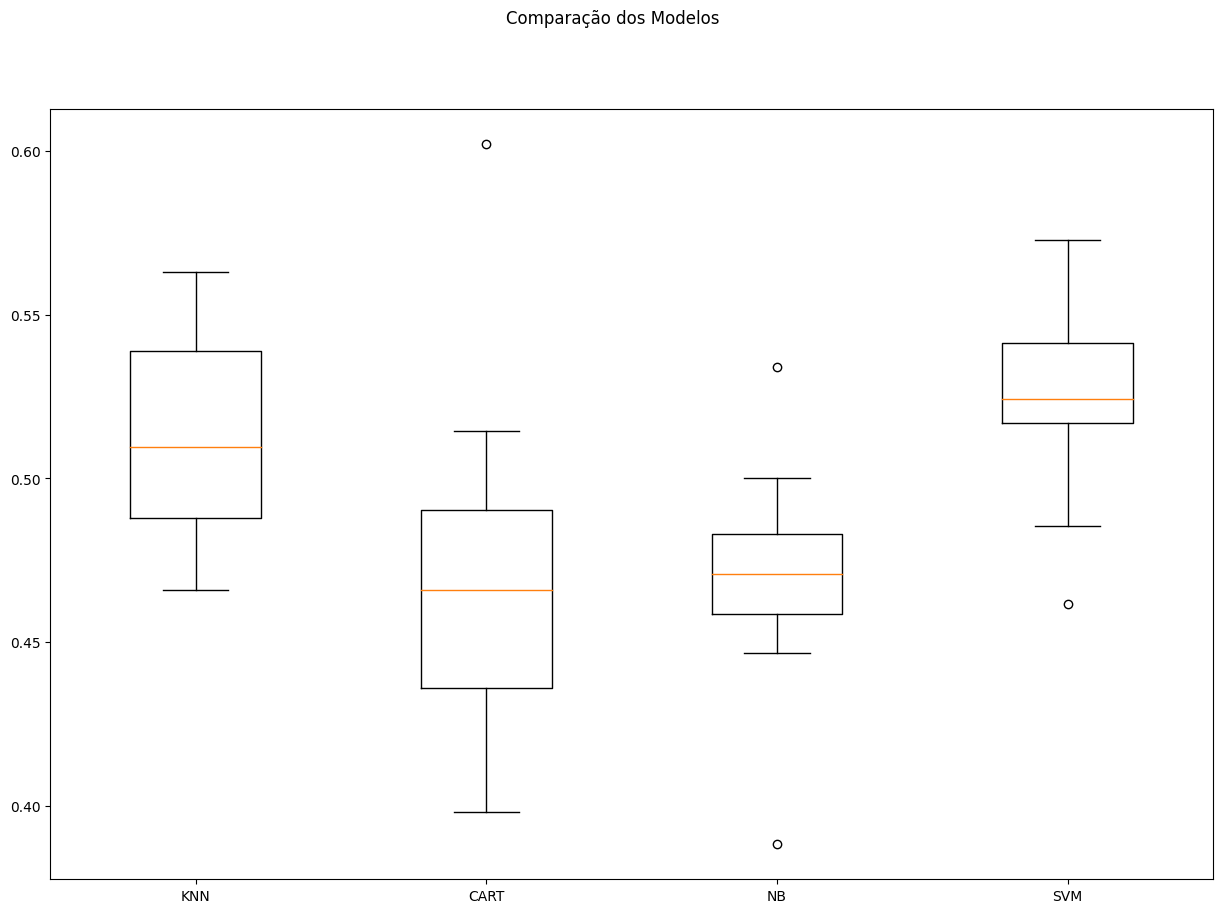

In [4]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Neste resultado, cada linha representa um modelo, e os valores apresentados são a média e o desvio padrão da acurácia obtida através da validação cruzada.
# O modelo SVM obteve a maior acurácia média, seguido por KNN, CART e NB.
# O desvio padrão fornece uma medida da variabilidade dos resultados durante a validação cruzada.

### Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.512 (0.031)
CART-orig: 0.470 (0.056)
NB-orig: 0.469 (0.036)
SVM-orig: 0.525 (0.031)
KNN-padr: 0.481 (0.044)
CART-padr: 0.474 (0.042)
NB-padr: 0.469 (0.036)
SVM-padr: 0.555 (0.041)
KNN-norm: 0.446 (0.034)
CART-norm: 0.470 (0.047)
NB-norm: 0.469 (0.036)
SVM-norm: 0.527 (0.037)


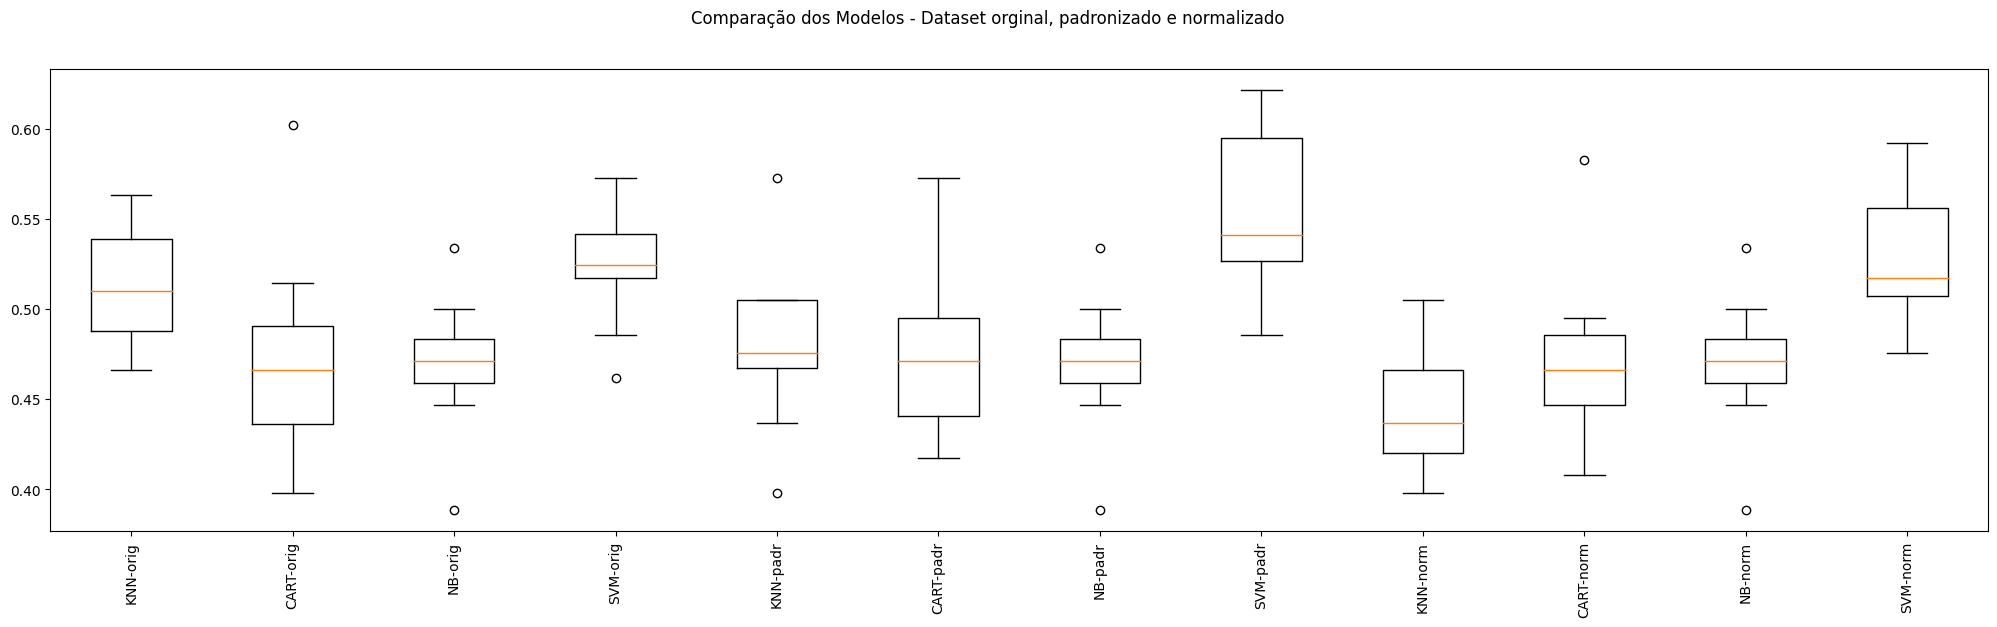

In [5]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines

# O código usa um loop for name, model in pipelines para iterar sobre cada pipeline,
# executando a validação cruzada e armazenando os resultados na lista results e os nomes na lista names.
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

# Os resultados da avaliação dos modelos utilizando diferentes configurações de dados (original, padronizado e normalizado) são apresentados a seguir:

# KNN-orig: O modelo KNN aplicado ao conjunto de dados original obteve uma acurácia média de 0.512, com um desvio padrão de 0.031. Isso sugere uma consistência razoável no desempenho do modelo em diferentes divisões dos dados de treino e teste.

# CART-orig: O modelo de árvore de decisão aplicado ao conjunto de dados original apresentou uma acurácia média de 0.470, com um desvio padrão mais elevado de 0.056. Isso indica uma variabilidade maior nos resultados, possivelmente devido à sensibilidade do modelo às diferentes partições dos dados.

# NB-orig: O modelo Naive Bayes aplicado ao conjunto de dados original teve uma acurácia média de 0.469, com um desvio padrão de 0.036. O desvio padrão relativamente baixo sugere uma consistência razoável no desempenho do modelo.

# SVM-orig: O modelo de Support Vector Machine aplicado ao conjunto de dados original destacou-se com uma acurácia média de 0.525 e um desvio padrão de 0.031. Isso sugere uma estabilidade notável no desempenho do SVM em diferentes divisões dos dados.

# KNN-padr: Ao padronizar os dados antes de aplicar o KNN, a acurácia média foi de 0.481, com um desvio padrão de 0.044. A padronização não teve um impacto significativo na performance em comparação com o KNN aplicado aos dados originais.

# CART-padr: A padronização dos dados antes de aplicar a árvore de decisão resultou em uma acurácia média de 0.474, com um desvio padrão de 0.042. Similar ao KNN, a padronização não gerou uma mudança substancial no desempenho.

# NB-padr: O Naive Bayes aplicado a dados padronizados manteve uma acurácia média de 0.469, com um desvio padrão de 0.036, indicando consistência semelhante ao modelo aplicado aos dados originais.

# SVM-padr: A aplicação do SVM a dados padronizados resultou em uma acurácia média significativamente maior de 0.555, com um desvio padrão de 0.041. A padronização parece ter beneficiado o desempenho do SVM.

# KNN-norm: A normalização dos dados antes de aplicar o KNN levou a uma acurácia média de 0.446, com um desvio padrão de 0.034. A normalização teve um impacto negativo no desempenho do KNN em comparação com as outras configurações.

# CART-norm: A normalização dos dados antes de aplicar a árvore de decisão resultou em uma acurácia média de 0.470, com um desvio padrão de 0.047. Similar ao KNN-norm, a normalização não contribuiu positivamente para o desempenho.

# NB-norm: O Naive Bayes aplicado a dados normalizados manteve uma acurácia média de 0.469, com um desvio padrão de 0.036, indicando consistência semelhante ao modelo aplicado aos dados originais e padronizados.

# SVM-norm: A aplicação do SVM a dados normalizados resultou em uma acurácia média de 0.527, com um desvio padrão de 0.037. A normalização parece ter beneficiado o desempenho do SVM, embora não tanto quanto a padronização.



### Otimização dos hiperparâmetros

In [6]:


np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
svm = ('SVM', SVC())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines = [
    ('svm-orig', Pipeline(steps=[svm])),
    ('svm-padr', Pipeline(steps=[standard_scaler, svm])),
    ('svm-norm', Pipeline(steps=[min_max_scaler, svm])),
]

# Definindo o espaço de busca para os hiperparâmetros
# Define o espaço de busca para os hiperparâmetros do SVM.
# Aqui, os valores de C estão reduzidos para [1, 10], os kernels estão limitados a ['linear', 'rbf'], e somente um valor para gamma ('scale') é considerado.

param_grid = {
    'SVM__C': [1, 10],  # Reduzindo os valores de C
    'SVM__kernel': ['linear', 'rbf'],  # Reduzindo os kernels
    'SVM__gamma': ['scale']  # Mantendo apenas um valor para gamma
}

# Preparando e executando o GridSearchCV para encontrar os melhores hiperparâmetros para cada configuração do SVM
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # Imprime a melhor configuração
    print("Modelo: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

# Considerando a métrica de acurácia como critério de escolha, o modelo svm-padr obteve a melhor performance entre as três configurações.
# Este é o modelo que demonstrou a melhor capacidade de generalização para o conjunto de dados de validação.

Modelo: svm-orig - Melhor: 0.542280 usando {'SVM__C': 10, 'SVM__gamma': 'scale', 'SVM__kernel': 'rbf'}
Modelo: svm-padr - Melhor: 0.554817 usando {'SVM__C': 1, 'SVM__gamma': 'scale', 'SVM__kernel': 'rbf'}
Modelo: svm-norm - Melhor: 0.526680 usando {'SVM__C': 1, 'SVM__gamma': 'scale', 'SVM__kernel': 'rbf'}


## Finalização do Modelo

In [7]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
# Um objeto StandardScaler é criado e ajustado ao conjunto de treinamento (X_train).
# O ajuste do scaler calcula a média e o desvio padrão do conjunto de treinamento, que serão usados para padronizar os dados.

scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino

#  O conjunto de treinamento é padronizado usando o scaler ajustado.
# Isso significa subtrair a média e dividir pelo desvio padrão para garantir que os dados estejam centrados e com escala apropriada.

rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = SVC(C=1, kernel='rbf', gamma='scale')

# O modelo KNN é treinado com os dados padronizados (rescaledX) e os rótulos de treinamento (y_train).

model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))




0.5452488687782805


In [11]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

SVC(C=1)

## Simulando a aplicação do modelo em dados não vistos

In [12]:
# Novos dados

data = {'wifeAge':  [26, 34, 50],
        'wifeEducation': [4, 1, 1],
        'husbandEducation': [4, 2, 1],
        'numberOfChildrenEverBorn': [0, 5, 7],
        'wifeReligion': [0, 0, 1],
        'wifeNowWorking': [0, 1, 1],
        'husbandOcupation': [4, 2, 2],
        'standardOfLivingIndex': [4, 2, 2],
        'mediaExposure': [0, 0, 1],
        }

atributos = ['wifeAge', 'wifeEducation', 'husbandEducation','numberOfChildrenEverBorn',
'wifeReligion', 'wifeNowWorking', 'husbandOcupation','standardOfLivingIndex',
'mediaExposure']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:9].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-0.79499004  1.02637608  0.69879271 -1.38325689 -2.38651515 -1.72970226
   2.15390274  0.88771624 -0.28268715]
 [ 0.17771919 -1.93030964 -1.75197316  0.73741068 -2.38651515  0.57813418
  -0.15940294 -1.16182298 -0.28268715]
 [ 2.12313766 -1.93030964 -2.9773561   1.58567771  0.41902102  0.57813418
  -0.15940294 -1.16182298  3.53747954]]


In [13]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[1 3 1]


In [15]:
# Exportação do modelo treinado

pickle_out = open("modelo_treinado.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()


In [17]:
# Usando a inferencia do modelo a partir do arquivo

pickle_in = open("modelo_treinado.pkl", "rb")
modelo2 = pickle.load(pickle_in)
pickle_in.close()

saidas = modelo2.predict(rescaledEntradaX)
print(saidas)

[1 3 1]


Neste estudo, realizamos uma otimização de hiperparâmetros para um modelo SVM (Support Vector Machine) em três cenários distintos de pré-processamento de dados: original, padronizado e normalizado. O objetivo foi encontrar a melhor configuração para maximizar a acurácia na previsão do método contraceptivo escolhido por mulheres casadas, com base em suas características demográficas e socioeconômicas.

Modelo Selecionado:

O modelo SVM com padronização dos dados (svm-padr) demonstrou a melhor performance, alcançando uma acurácia de 55.5% no conjunto de validação.
Hiperparâmetros ótimos: C=1, kernel='rbf', gamma='scale'.

Pontos de Atenção:

Embora a acurácia tenha melhorado com a padronização, é importante considerar outras métricas de avaliação, como precisão, recall e F1-score, para obter uma visão mais completa do desempenho do modelo.

Conclusão:

Uma acurácia de 55% pode indicar um desempenho moderado, mas é essencial considerar o contexto do problema, métricas adicionais e a aplicação prática do modelo para determinar se ele atende aos requisitos específicos.